In [1]:
## IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ruta del archivo Parquet
file_path = 'dataset/dataset.parquet'

# Leer el archivo usando Pandas
df = pd.read_parquet(file_path)

Preguntas interesantes para considerar aquí: (elija una o dos)

• ¿Existe una manera de caracterizar los lugares más recurrentes para
inicio/fin de viaje? 

- Habría que reemplazar PULocationID y DOLocationID por su respectivo valor zonal, usando la columna "Zone" de 'dataset\taxi_zone_lookup.csv', y ver qué combinaciones son las mas frecuentes.
    

• ¿Cómo son los viajes típicamente en distancia y tiempo?

- Para la Distancia: usar trip_distance
- Para el Tiempo:Crear una nueva columna restanto tpep_dropoff_datetime y tpep_pickup_datetime, de aqui tenemos el tiempo total de viaje 

- IDEA: En que franja horaria ocurre la mayor cantidad de viajes?



• ¿Podremos segmentar los viajes de alguna manera? (clusterización)

- Ni idea, capaz por Mes y ver qué mes tiene mas viajes, cuales son más caros, etc.

## 2. Análisis exploratorio inicial

## - Visualizar las primeras filas.

In [3]:
#Checkeando que está todo bien
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,1.0,N,140,68,1,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2.5,NaN
1,1,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,1.0,N,79,226,1,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2.5,NaN
2,1,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,1.0,N,238,116,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0,NaN
3,1,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,1.0,N,141,116,2,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2.5,NaN
4,1,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,1.0,N,186,75,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,NaN


## - Realizar un resumen de 5 números.

In [4]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
min,1.0,2008-12-31 23:05:27,2008-12-31 23:25:04,0.0,0.00,1.0,1.0,1.0,0.0,-480.00,-4.50,-0.5,-111.00,-28.75,-0.3,-480.80,-2.5,0.0
25%,1.0,2020-07-02 14:32:59.500000,2020-07-02 14:46:34,1.0,1.00,1.0,107.0,90.0,1.0,6.00,0.00,0.5,0.00,0.00,0.3,10.80,2.5,0.0
50%,2.0,2020-07-26 15:32:29,2020-07-26 15:47:57,1.0,1.80,1.0,161.0,160.0,1.0,9.00,0.50,0.5,1.66,0.00,0.3,14.15,2.5,0.0
75%,2.0,2020-08-14 13:42:17,2020-08-14 13:56:42.500000,1.0,3.40,1.0,234.0,233.0,2.0,15.00,2.50,0.5,2.75,0.00,0.3,20.49,2.5,0.0
max,6.0,2020-09-01 00:00:12,2020-09-01 21:40:56,9.0,256069.13,99.0,265.0,265.0,5.0,187438.96,90.06,3.3,1001.00,126.12,0.3,187443.26,2.5,0.0


## - Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

In [5]:
# Identificar tipos de datos
data_types = df.dtypes

# Clasificación de tipos de datos
type_classification = {}
for column in df.columns:
    dtype = data_types[column]
    if pd.api.types.is_string_dtype(dtype):
        type_classification[column] = 'Categórico/Textual'
    elif pd.api.types.is_numeric_dtype(dtype):
        type_classification[column] = 'Numérico'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        type_classification[column] = 'Temporal'
    else:
        type_classification[column] = 'Otro'

# Evaluación de la informatividad para clasificación
informative_columns = {}
for column in df.columns:
    if type_classification[column] in ['Categórico/Textual', 'Numérico', 'Temporal']:
        # Heurística: los códigos únicos y nombres propios no son informativos
        if column.lower() in ['id', 'name', 'matricula', 'codigo','airport_fee','store_and_fwd_flag']:
            informative_columns[column] = 'No Informativa'
        else:
            informative_columns[column] = 'Informativa'
    else:
        informative_columns[column] = 'No Informativa'

# Crear un dataframe con la clasificación y evaluación
result_df = pd.DataFrame({
    'Tipo de Dato': [type_classification[col] for col in df.columns],
    'Informativa para Clasificación': [informative_columns[col] for col in df.columns]
}, index=df.columns)


# Mostrar el dataframe resultante
result_df

,Tipo de Dato,Informativa para Clasificación
VendorID,Numérico,Informativa
tpep_pickup_datetime,Temporal,Informativa
tpep_dropoff_datetime,Temporal,Informativa
passenger_count,Numérico,Informativa
trip_distance,Numérico,Informativa
RatecodeID,Numérico,Informativa
store_and_fwd_flag,Categórico/Textual,No Informativa
PULocationID,Numérico,Informativa
DOLocationID,Numérico,Informativa
payment_type,Numérico,Informativa


Como podemos ver, casi todas las variables son informativas debido a la naturaleza intrinseca del dataset, ya que la descripcion de cada variable implica y explica una relacion directa con la variable de salida seleccionada. Más adelante veremos la relacion directa entre cada variable de entrada y la variable de salida.

- store_and_fwd_flag: No es informativa debido a que no aporta ningun tipo de criterio util segun la descripcion de la variable, ademas de tener muchos valores nulos.
- airport_fee: No es informativa debido a que solo hay un solo valor para esta variable en todo el dataset.

## - Identificar las variables de entrada y de salida del problema.

Todas menos total_amount son variables de entrada. 

- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable:
    - **Numéricas:** Obtener conclusiones acerca de la distribución de los datos.
    - **Categorías:** Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.
    - **Compuestas:** ¿Pueden tratarse para utilizarse en el problema a resolver?

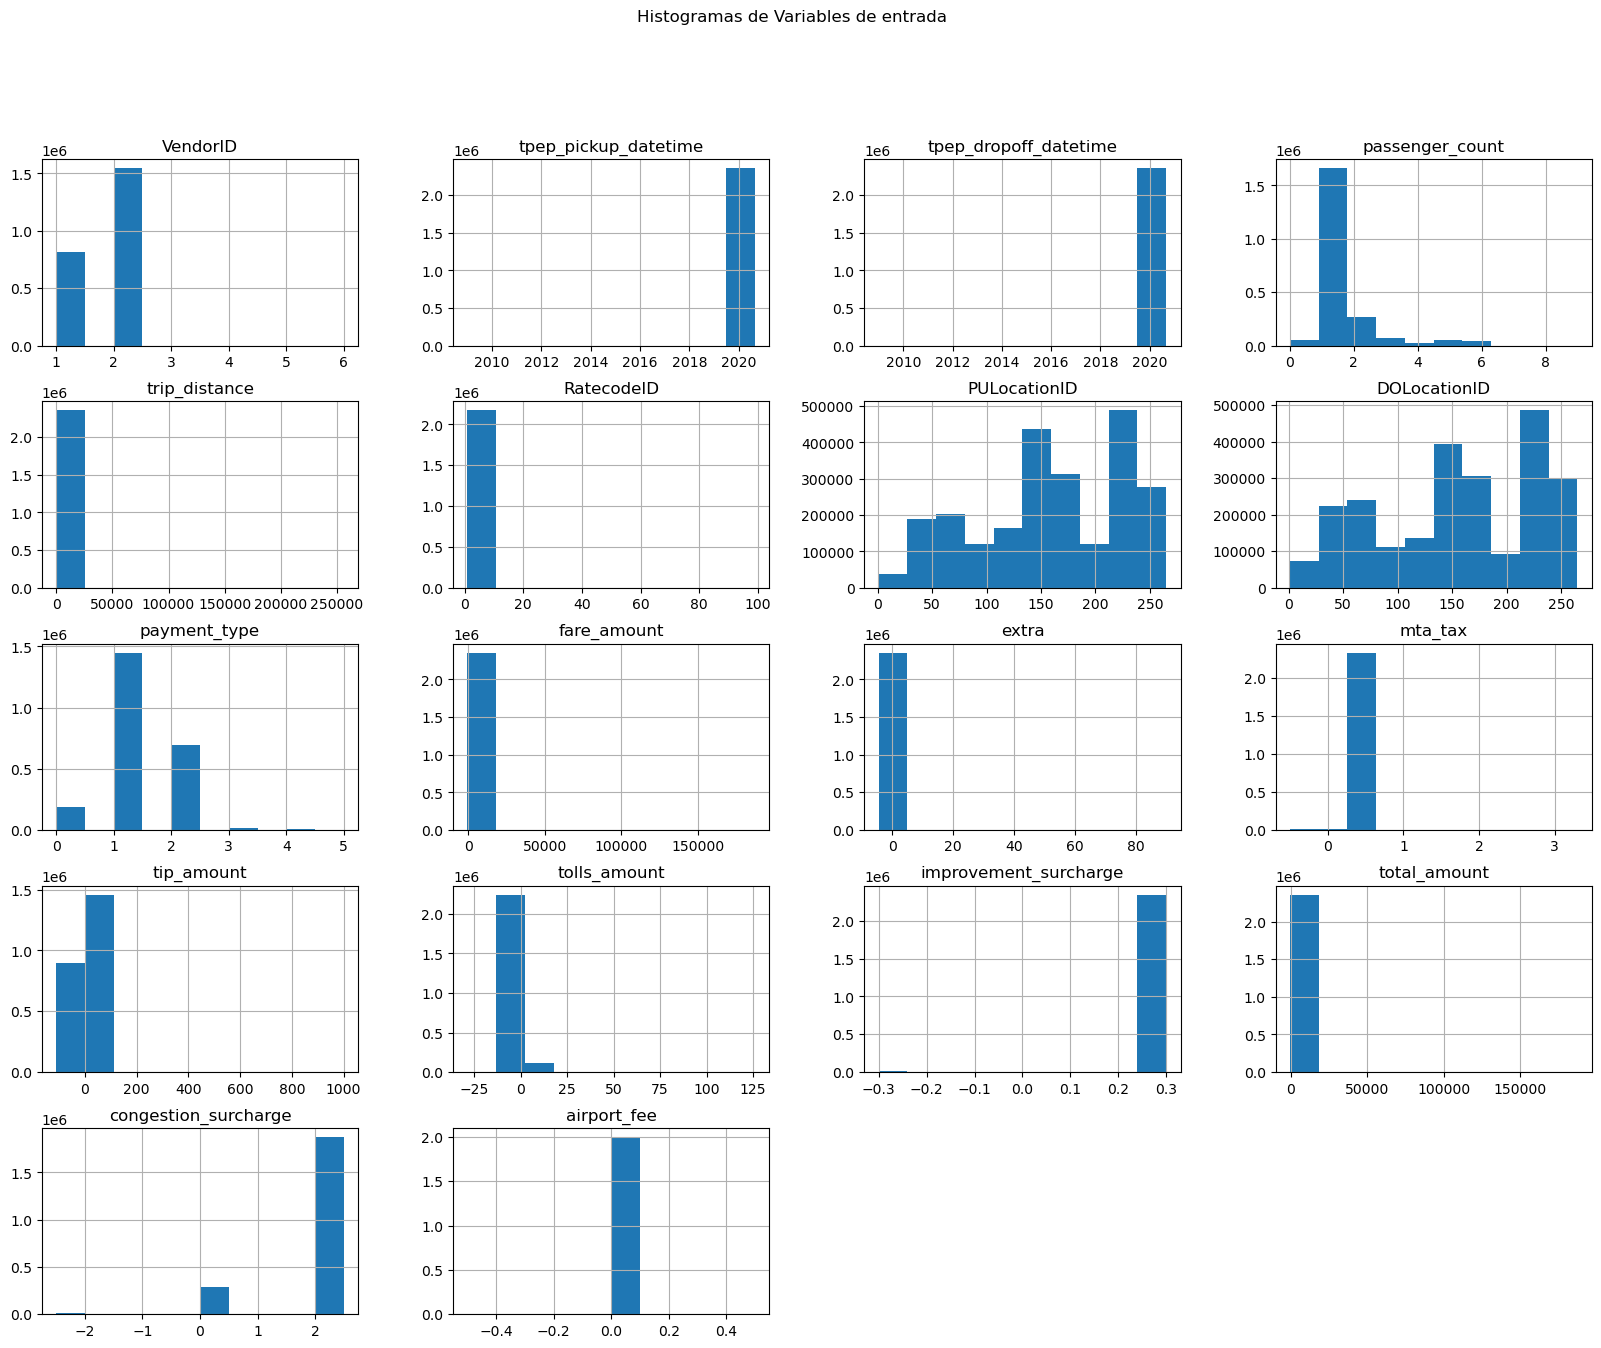

In [7]:
df.hist(bins=10,
    figsize=(20, 15))
plt.suptitle('Histogramas de Variables de entrada')
plt.show()

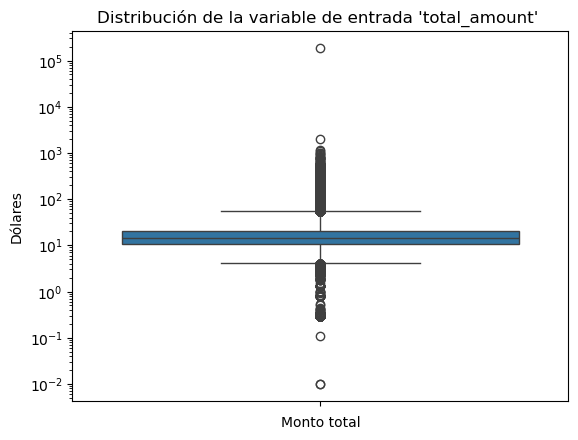

In [10]:
sns.boxplot(y="total_amount", data=df,log_scale=True)
plt.ylabel("Dólares")
plt.xlabel("Monto total")
plt.title("Distribución de la variable de entrada 'total_amount' ")
plt.show() 

## 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.

- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico.

- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿podría identificar las variables de entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

In [ ]:
# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# Create new column with elapsed time from tpep_pickup_datetime to tpep_pickup_datetime
df['elapsed_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [ ]:
df['elapsed_time'] = df['elapsed_time'].apply(lambda x: str(x).split()[-1])

In [ ]:
print(df['elapsed_time'].head())